In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **Data Wrangling**

In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## **Data Analysis**

In [7]:
df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

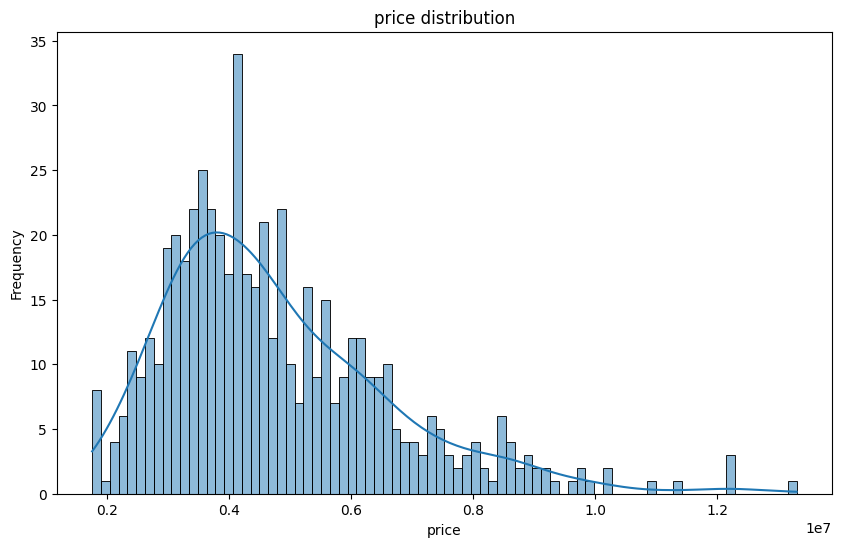

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=80, kde=True)  
plt.title("price distribution")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

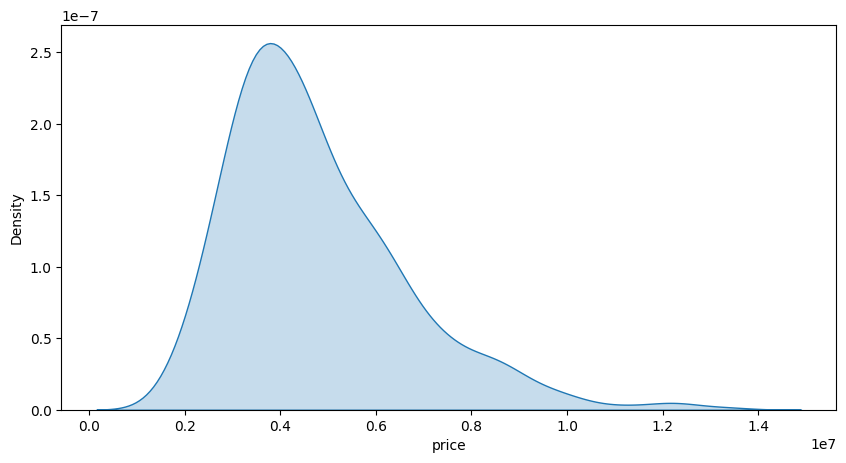

In [9]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'],fill=True)
plt.show()


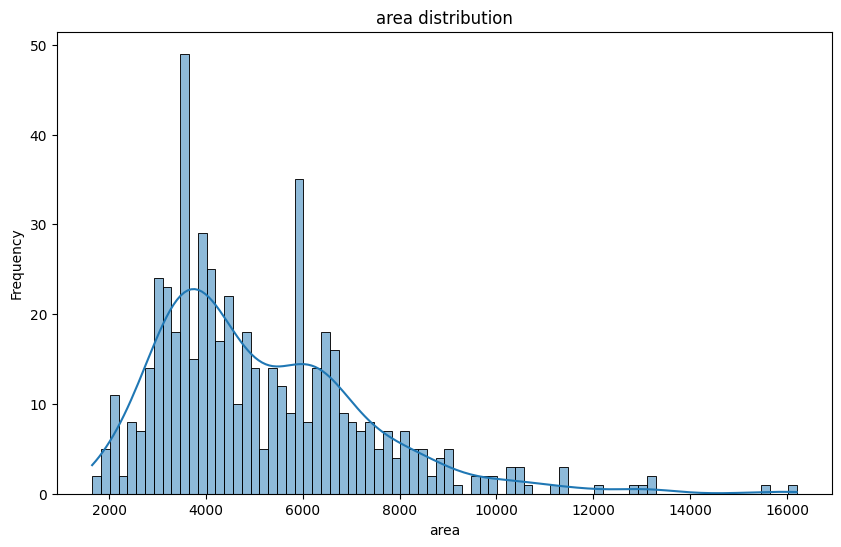

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['area'],bins=80, kde=True)  
plt.title("area distribution")
plt.xlabel("area")
plt.ylabel("Frequency")
plt.show()

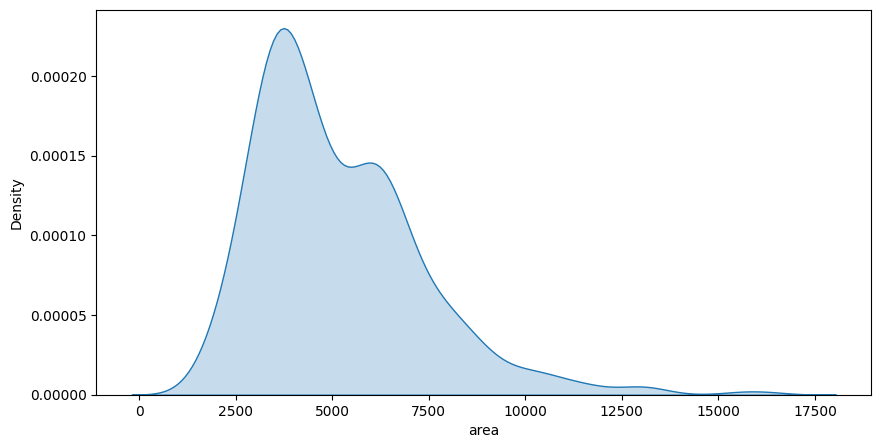

In [11]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['area'],fill=True)
plt.show()

In [14]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\1841372615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['bedrooms'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\1841372615.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot( x=df['bedrooms'].value_counts().index,


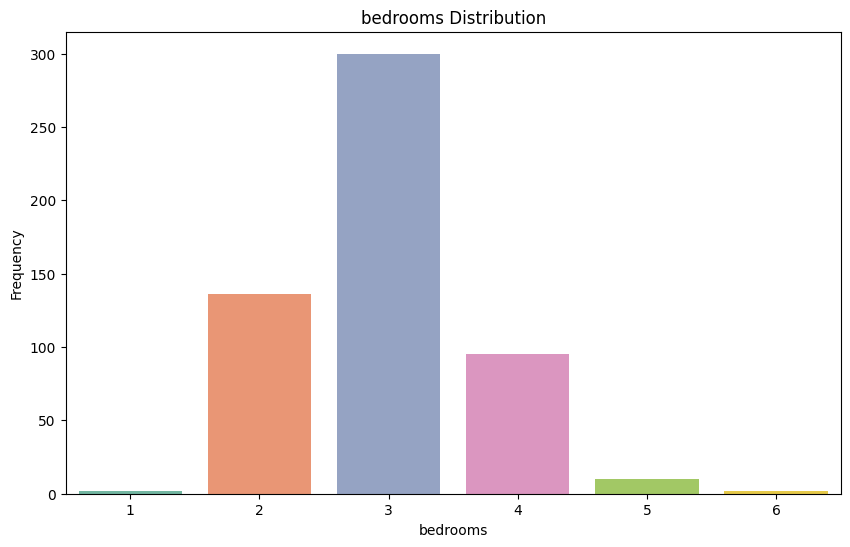

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['bedrooms'].value_counts().index,
            y=df['bedrooms'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('bedrooms Distribution')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.show()

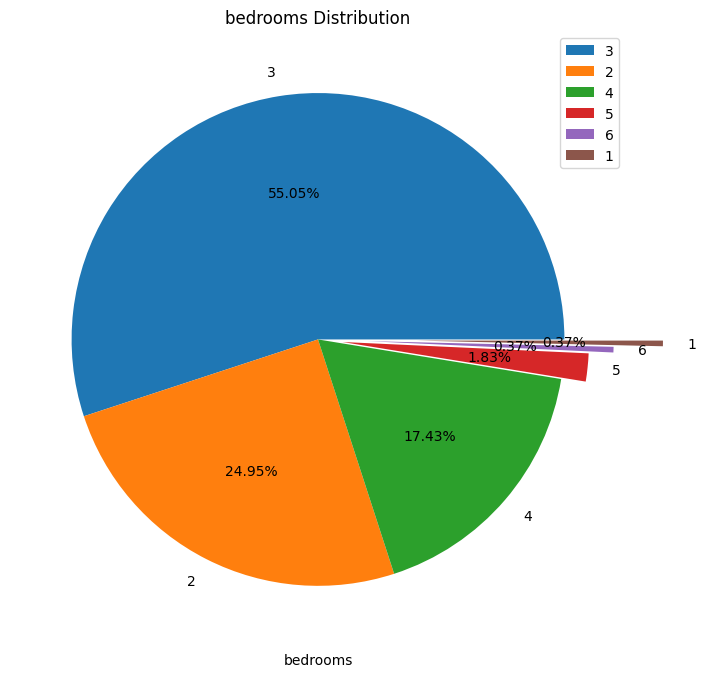

In [24]:
plt.figure(figsize=(10, 8))
plt.pie(df['bedrooms'].value_counts(),
        explode=[0,0,0,0.1,0.2,0.4],
        labels=df['bedrooms'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('bedrooms Distribution')
plt.xlabel('bedrooms')
plt.legend()
plt.show()

In [25]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2297257253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['bathrooms'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2297257253.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot( x=df['bathrooms'].value_counts().index,


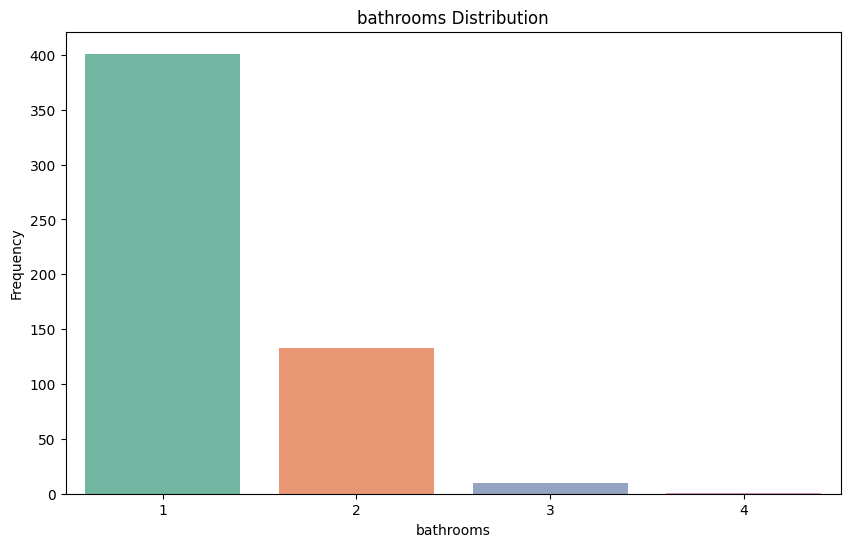

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['bathrooms'].value_counts().index,
            y=df['bathrooms'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('bathrooms Distribution')
plt.xlabel('bathrooms')
plt.ylabel('Frequency')
plt.show()

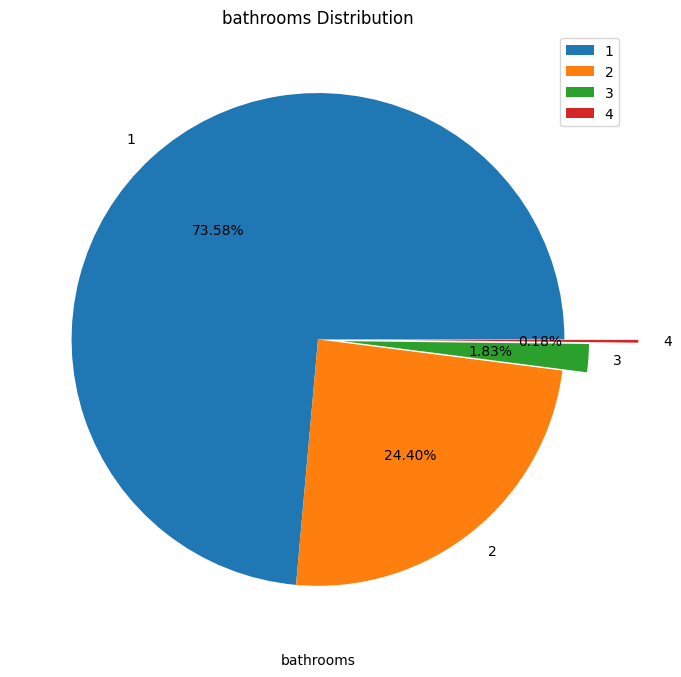

In [31]:
plt.figure(figsize=(10, 8))
plt.pie(df['bathrooms'].value_counts(),
        explode=[0,0.0,0.1,0.3],
        labels=df['bathrooms'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('bathrooms Distribution')
plt.xlabel('bathrooms')
plt.legend()
plt.show()

In [29]:
df['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\118992287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['stories'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\118992287.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot( x=df['stories'].value_counts().index,


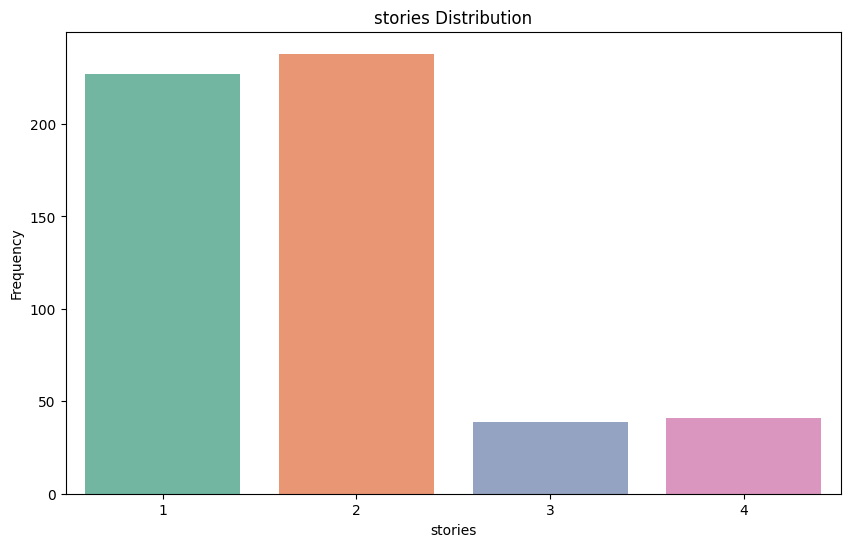

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['stories'].value_counts().index,
            y=df['stories'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('stories Distribution')
plt.xlabel('stories')
plt.ylabel('Frequency')
plt.show()

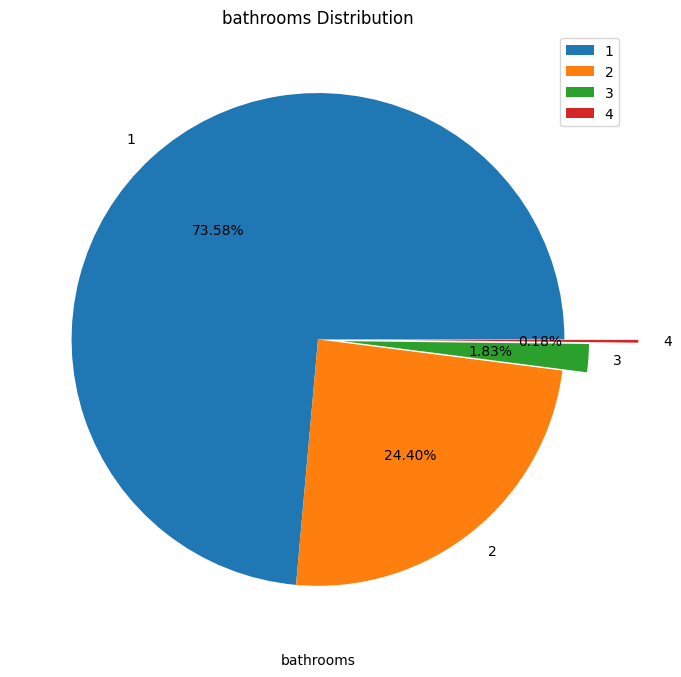

In [33]:
plt.figure(figsize=(10, 8))
plt.pie(df['bathrooms'].value_counts(),
        explode=[0,0.0,0.1,0.3],
        labels=df['bathrooms'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('bathrooms Distribution')
plt.xlabel('bathrooms')
plt.legend()
plt.show()

In [34]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2535122706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['mainroad'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2535122706.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['mainroad'].value_counts().index,


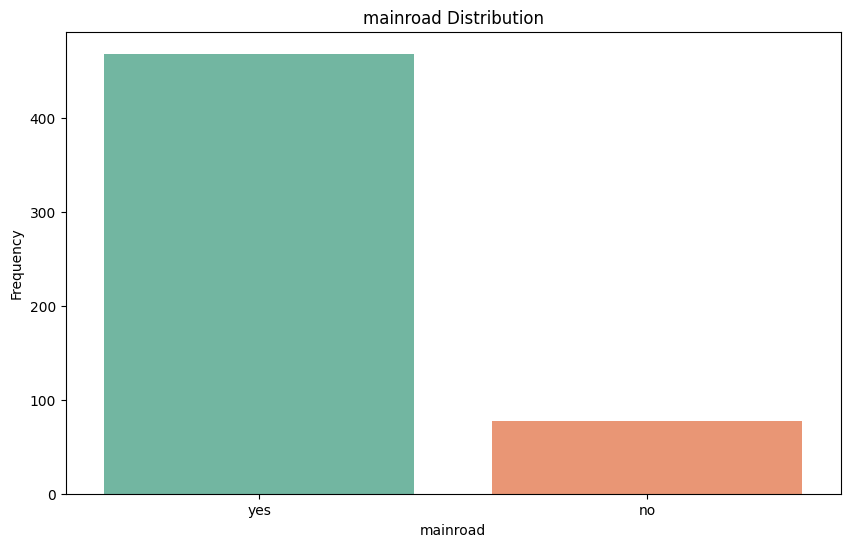

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['mainroad'].value_counts().index,
            y=df['mainroad'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('mainroad Distribution')
plt.xlabel('mainroad')
plt.ylabel('Frequency')
plt.show()

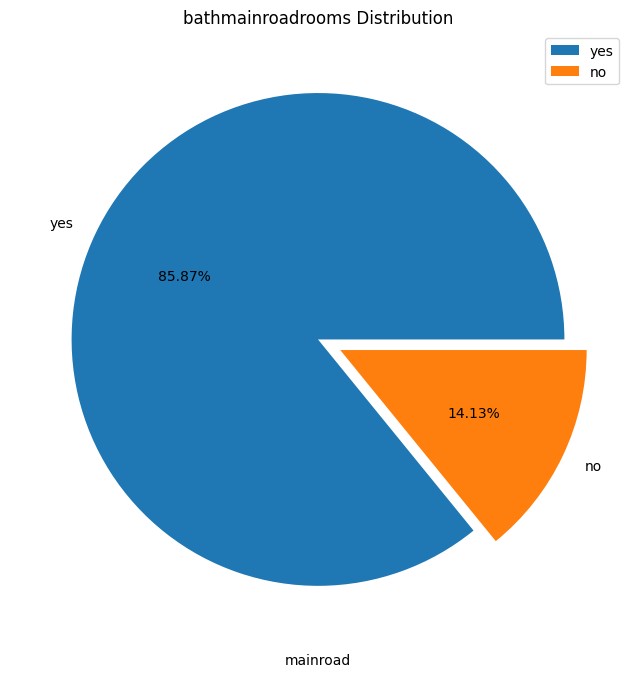

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['mainroad'].value_counts(),
        explode=[0,0.1],
        labels=df['mainroad'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('mainroad Distribution')
plt.xlabel('mainroad')
plt.legend()
plt.show()

In [37]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\1491261127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['guestroom'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\1491261127.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['guestroom'].value_counts().index,


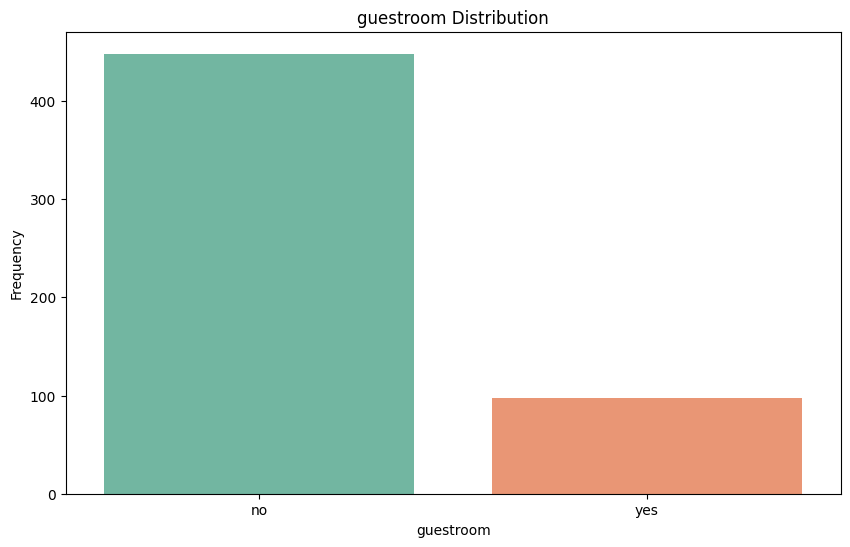

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['guestroom'].value_counts().index,
            y=df['guestroom'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('guestroom Distribution')
plt.xlabel('guestroom')
plt.ylabel('Frequency')
plt.show()

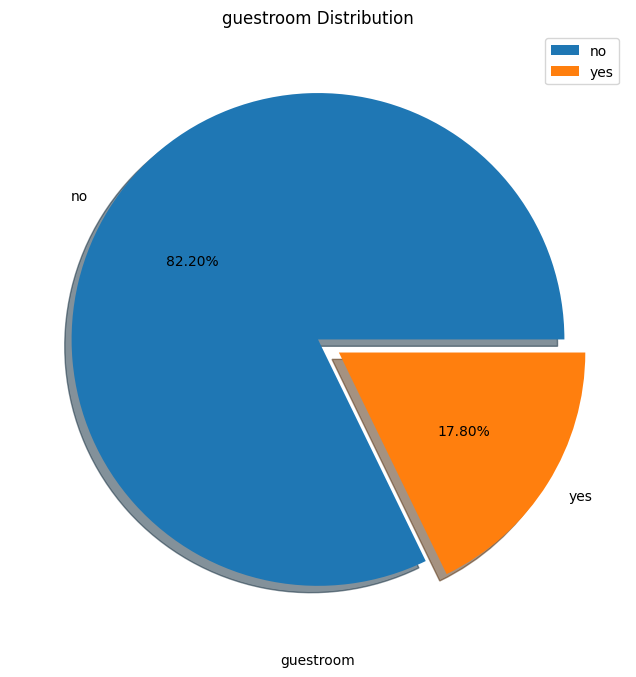

In [39]:
plt.figure(figsize=(10, 8))
plt.pie(df['guestroom'].value_counts(),
        explode=[0,0.1],
        labels=df['guestroom'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('guestroom Distribution')
plt.xlabel('guestroom')
plt.legend()
plt.show()

In [40]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\3490805877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['basement'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\3490805877.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['basement'].value_counts().index,


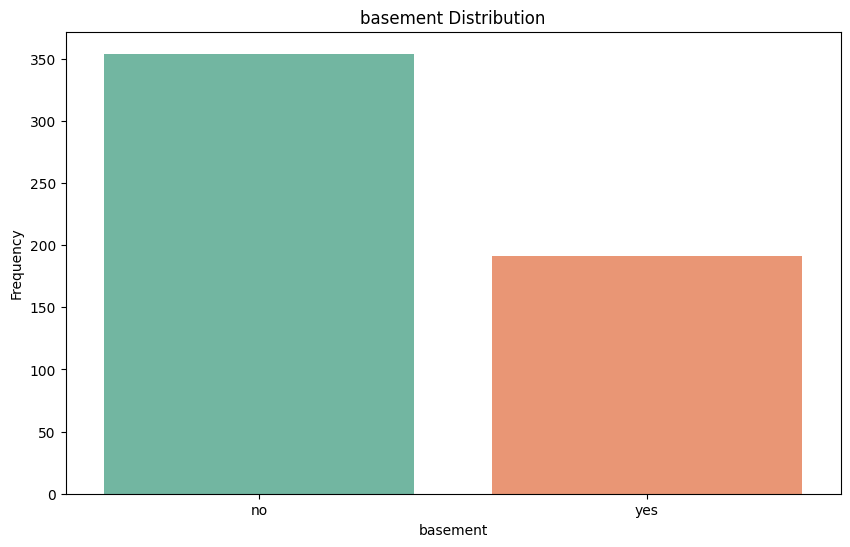

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['basement'].value_counts().index,
            y=df['basement'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('basement Distribution')
plt.xlabel('basement')
plt.ylabel('Frequency')
plt.show()

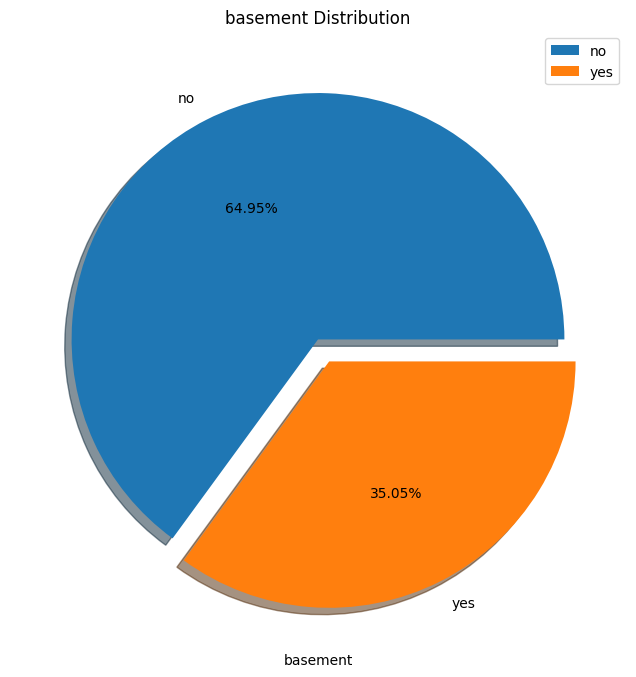

In [42]:
plt.figure(figsize=(10, 8))
plt.pie(df['basement'].value_counts(),
        explode=[0,0.1],
        labels=df['basement'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('basement Distribution')
plt.xlabel('basement')
plt.legend()
plt.show()

In [44]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\4133729251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['hotwaterheating'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\4133729251.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['hotwaterheating'].value_counts().index,


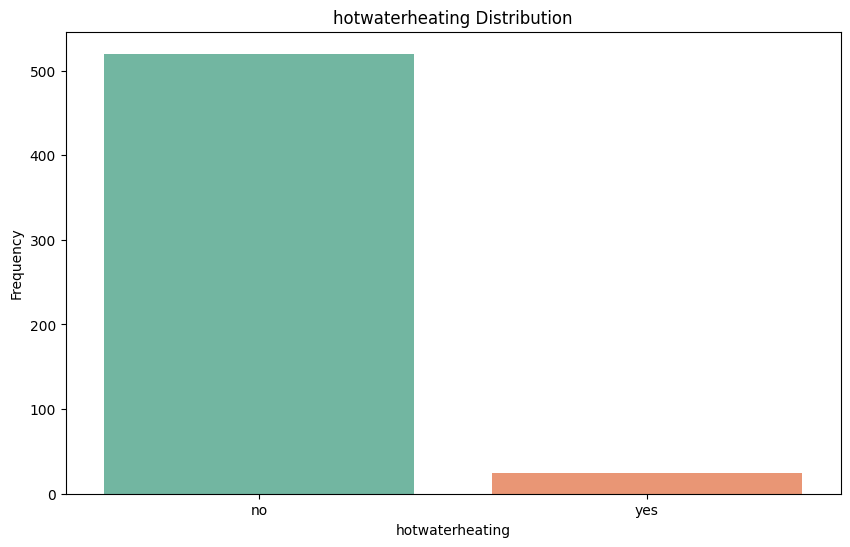

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['hotwaterheating'].value_counts().index,
            y=df['hotwaterheating'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('hotwaterheating Distribution')
plt.xlabel('hotwaterheating')
plt.ylabel('Frequency')
plt.show()

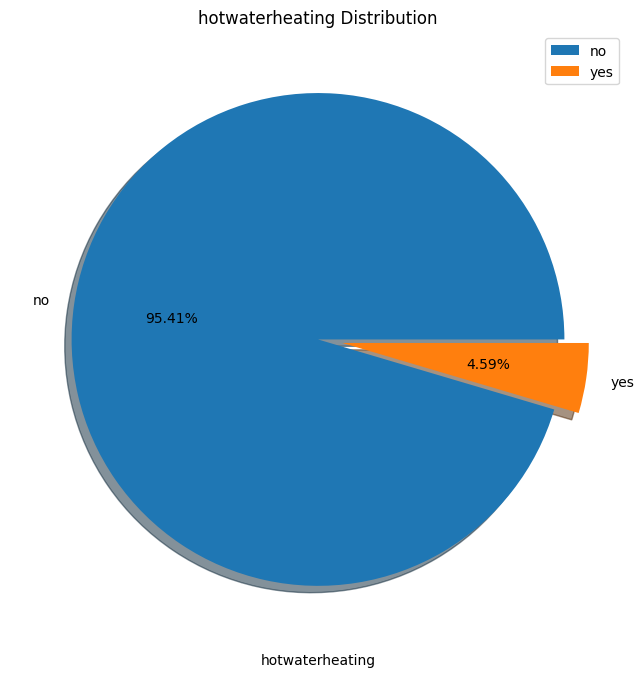

In [47]:
plt.figure(figsize=(10, 8))
plt.pie(df['hotwaterheating'].value_counts(),
        explode=[0,0.1],
        labels=df['hotwaterheating'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('hotwaterheating Distribution')
plt.xlabel('hotwaterheating')
plt.legend()
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\3329778482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['airconditioning'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\3329778482.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['airconditioning'].value_counts().index,


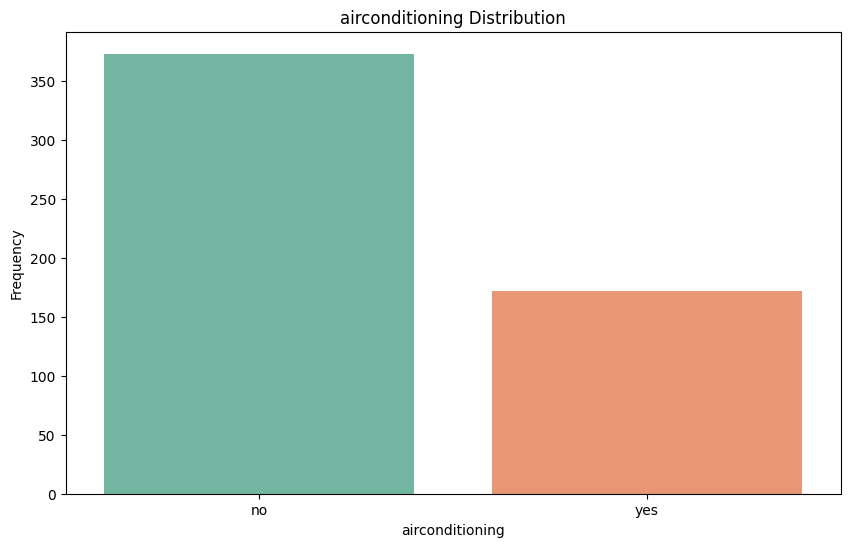

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['airconditioning'].value_counts().index,
            y=df['airconditioning'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('airconditioning Distribution')
plt.xlabel('airconditioning')
plt.ylabel('Frequency')
plt.show()

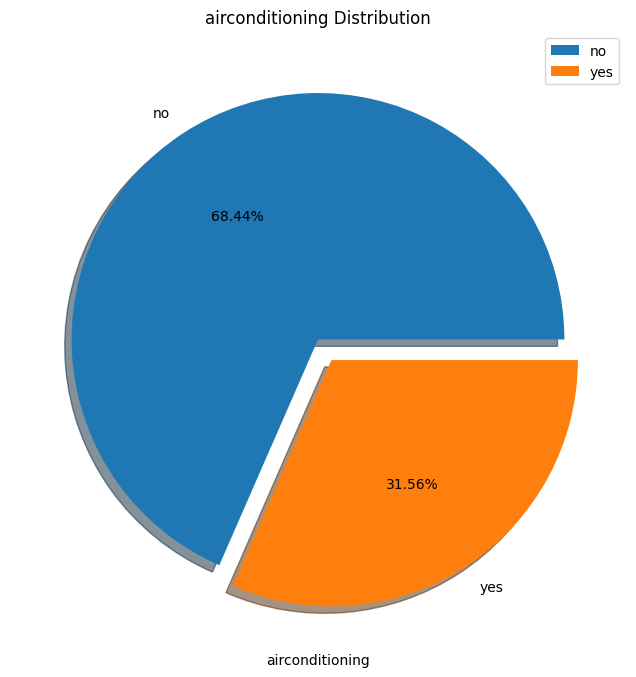

In [49]:
plt.figure(figsize=(10, 8))
plt.pie(df['airconditioning'].value_counts(),
        explode=[0,0.1],
        labels=df['airconditioning'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('airconditioning Distribution')
plt.xlabel('airconditioning')
plt.legend()
plt.show()

In [50]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\1447175471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['parking'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\1447175471.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot( x=df['parking'].value_counts().index,


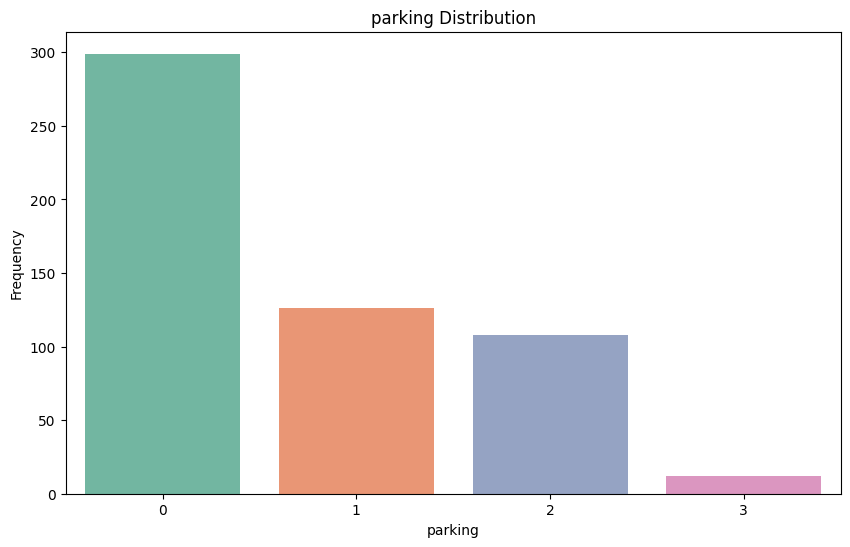

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['parking'].value_counts().index,
            y=df['parking'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('parking Distribution')
plt.xlabel('parking')
plt.ylabel('Frequency')
plt.show()

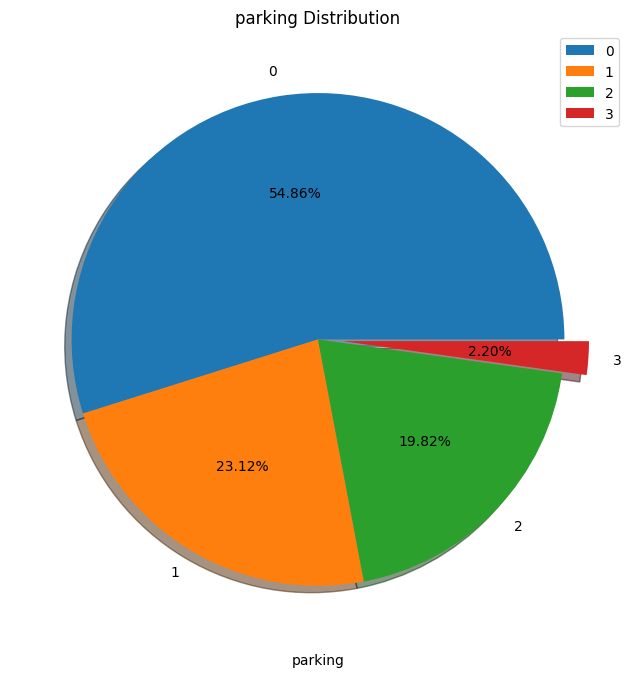

In [56]:
plt.figure(figsize=(10, 8))
plt.pie(df['parking'].value_counts(),
        explode=[0,0,0,0.1],
        labels=df['parking'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('parking Distribution')
plt.xlabel('parking')
plt.legend()
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2690925862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['prefarea'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2690925862.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['prefarea'].value_counts().index,


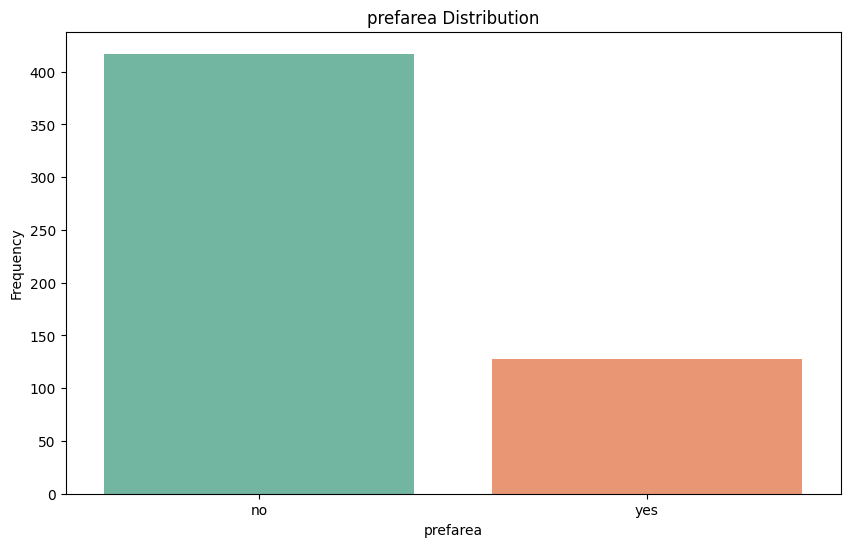

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['prefarea'].value_counts().index,
            y=df['prefarea'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('prefarea Distribution')
plt.xlabel('prefarea')
plt.ylabel('Frequency')
plt.show()

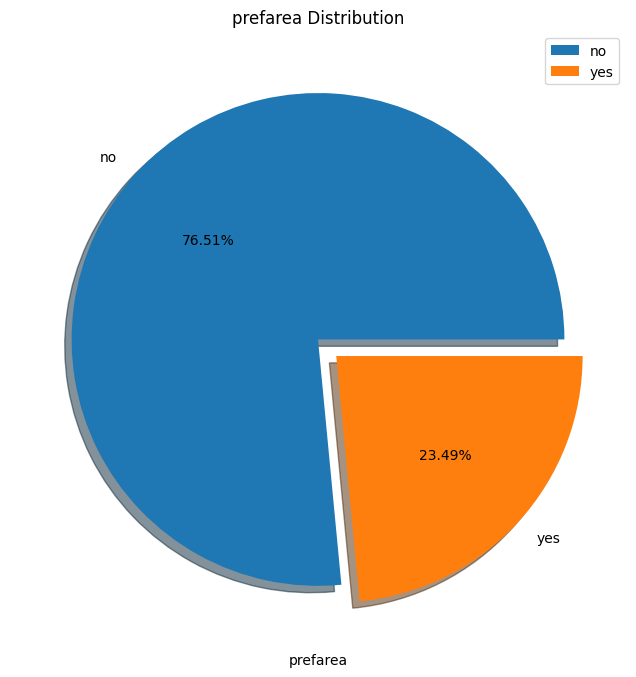

In [59]:
plt.figure(figsize=(10, 8))
plt.pie(df['prefarea'].value_counts(),
        explode=[0,0.1],
        labels=df['prefarea'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('prefarea Distribution')
plt.xlabel('prefarea')
plt.legend()
plt.show()

In [60]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2891341810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['furnishingstatus'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10068\2891341810.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot( x=df['furnishingstatus'].value_counts().index,


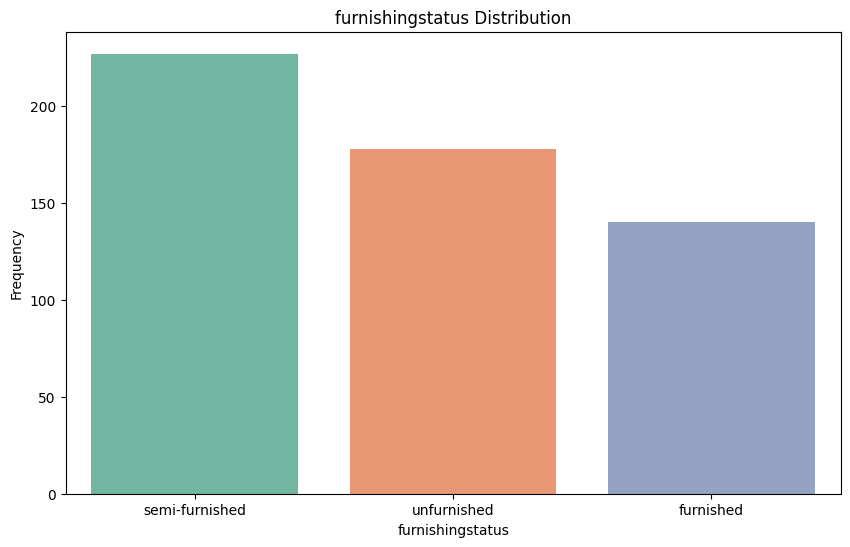

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['furnishingstatus'].value_counts().index,
            y=df['furnishingstatus'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('furnishingstatus Distribution')
plt.xlabel('furnishingstatus')
plt.ylabel('Frequency')
plt.show()

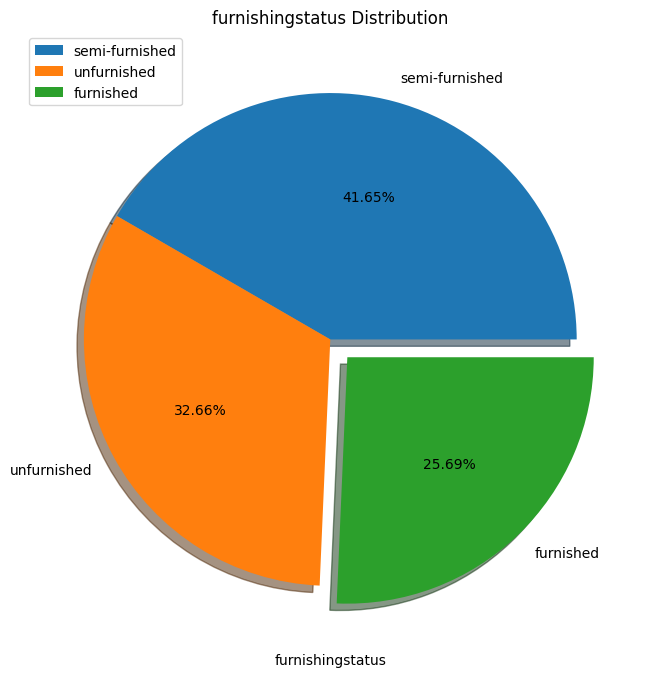

In [62]:
plt.figure(figsize=(10, 8))
plt.pie(df['furnishingstatus'].value_counts(),
        explode=[0,0,0.1],
        labels=df['furnishingstatus'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('furnishingstatus Distribution')
plt.xlabel('furnishingstatus')
plt.legend()
plt.show()

In [12]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
